In [34]:
using Distributions
using StatsPlots
using CSV
using DataFrames
using StatisticalRethinking

# setting default attributes for plots
default(labels=false)

# 4.1 Why normal distributions are normal

Code 4.1

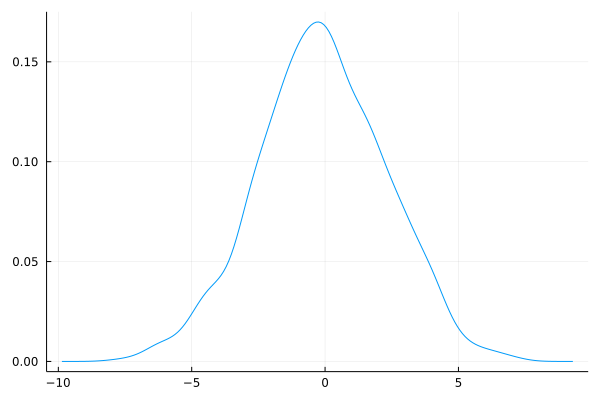

In [9]:
n = rand(Uniform(-1, 1), 1000, 16);
pos = sum.(eachrow(n));
density(pos)

Code 4.2

In [11]:
prod(1 .+ rand(Uniform(0, .1), 12))

2.1179991123749504

Code 4.3

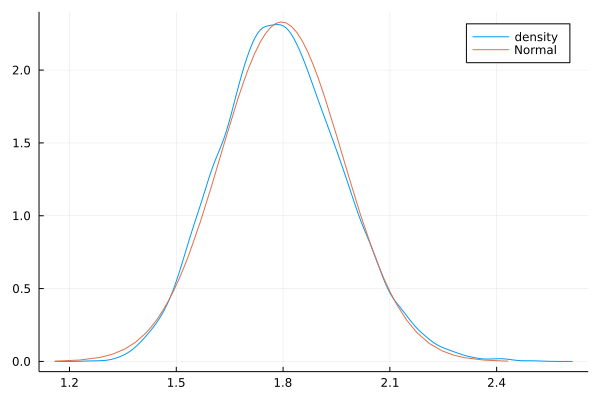

In [12]:
u = Uniform(0, .1)
growth = prod.(eachrow(1 .+ rand(u, 10000, 12)));

density(growth; label="density")
# overlay normal distribution
μ = mean(growth)
σ = std(growth)
plot!(Normal(μ, σ); label="Normal")

Code 4.4

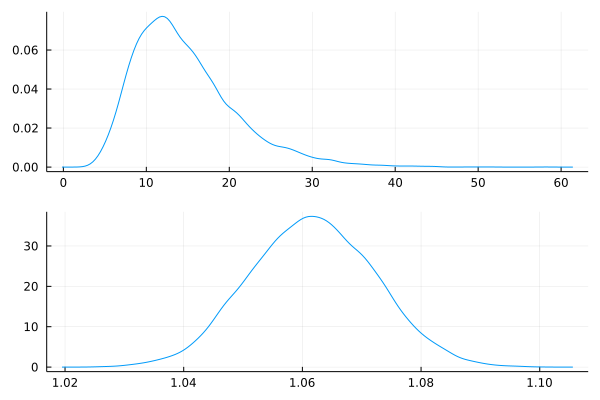

In [25]:
big = prod.(eachrow(1 .+ rand(Uniform(0, 0.5), 10000, 12)));
small = prod.(eachrow(1 .+ rand(Uniform(0, 0.01), 10000, 12)));
density([big, small]; layout=(2, 1))

Code 4.5

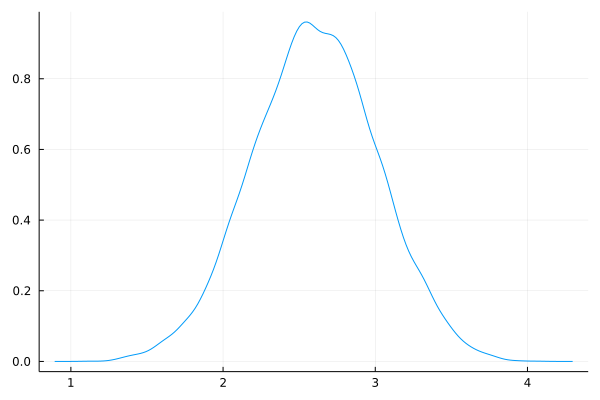

In [28]:
density(log.(big))

# 4.2 A language for describing models

Code 4.6

In [29]:
w = 6
n = 9
p_grid = range(0, 1; length=100)
bin_dens = [pdf(Binomial(n, p), w) for p in p_grid]
uni_dens = [pdf(Uniform(0, 1), p) for p in p_grid];
posterior = bin_dens .* uni_dens
posterior /= sum(posterior);

# 4.3 Gaussian model of height

Code 4.7

In [31]:
d = DataFrame(CSV.File("data/Howell1.csv"));

Code 4.8

In [32]:
describe(d)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,height,138.264,53.975,148.59,179.07,0,Float64
2,weight,35.6106,4.25242,40.0578,62.9926,0,Float64
3,age,29.3444,0.0,27.0,88.0,0,Float64
4,male,0.472426,0,0.0,1,0,Int64


Code 4.9

In [35]:
precis(d)

┌────────┬────────────────────────────────────────────────────────────┐
│  param │    mean      std     5.5%      50%    94.5%      histogram │
├────────┼────────────────────────────────────────────────────────────┤
│ height │ 138.264  27.6024  81.1086   148.59  165.735  ▁▁▁▂▂▂▂▂▂██▆▁ │
│ weight │ 35.6106  14.7192   9.3607  40.0578  54.5029  ▁▃▄▄▃▂▃▆██▅▃▁ │
│    age │ 29.3444  20.7469      1.0     27.0   66.135      █▆▆▆▆▃▃▁▁ │
│   male │  0.4724   0.4997      0.0      0.0      1.0    █▁▁▁▁▁▁▁▁▁█ │
└────────┴────────────────────────────────────────────────────────────┘


Code 4.10

In [38]:
d.height

544-element Array{Float64,1}:
 151.765
 139.7
 136.525
 156.845
 145.415
 163.83
 149.225
 168.91
 147.955
 165.1
 154.305
 151.13
 144.78
   ⋮
 156.21
 152.4
 162.56
 114.935
  67.945
 142.875
  76.835
 145.415
 162.56
 156.21
  71.12
 158.75

Code 4.11

In [50]:
d2 = d[d.age .>= 18,:];

Code 4.12

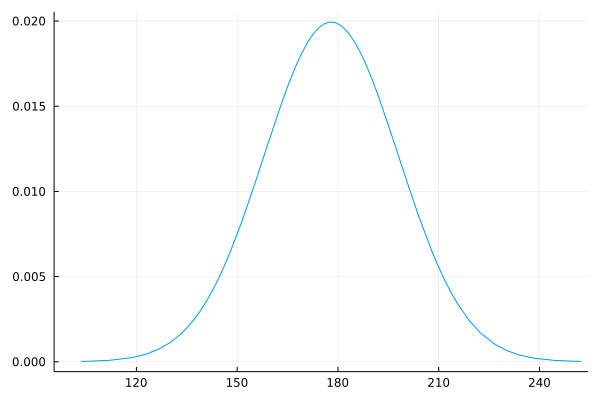

In [51]:
plot(Normal(178, 20); xlim=(100, 250))

Code 4.13

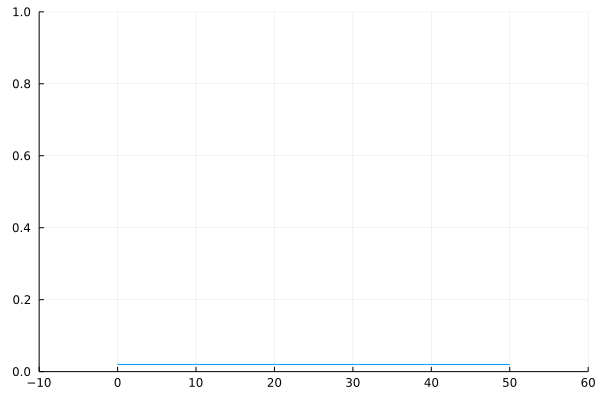

In [57]:
plot(Uniform(0, 50), xlim=(-10, 60), ylim=(0, 1))

Code 4.14

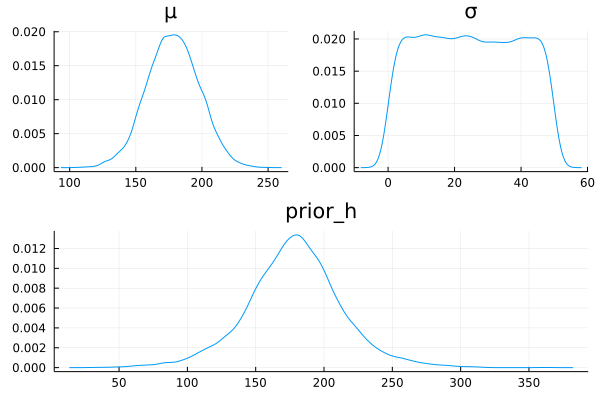

In [61]:
size = 10_000
sample_μ = rand(Normal(178, 20), size)
sample_σ = rand(Uniform(0, 50), size);
prior_h = [rand(Normal(μ, σ)) for (μ, σ) in zip(sample_μ, sample_σ)];

p1 = density(sample_μ; title="μ")
p2 = density(sample_σ; title="σ")
p3 = density(prior_h; title="prior_h")

plot(p1, p2, p3, layout=@layout [a b; c])

Code 4.15

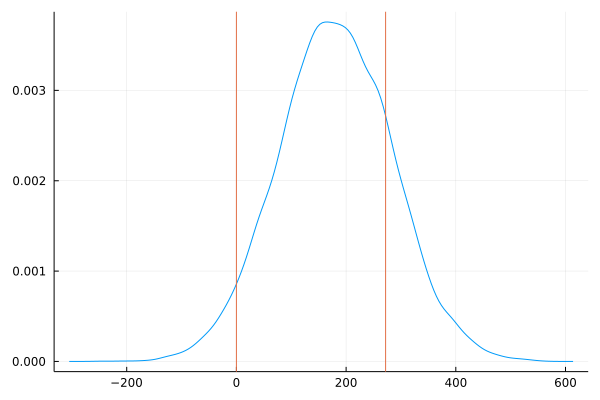

In [63]:
sample_μ = rand(Normal(178, 100), size)
prior_h = [rand(Normal(μ, σ)) for (μ, σ) in zip(sample_μ, sample_σ)];

density(prior_h)
vline!([0, 272])